
Credit Card Customer Churn: Cohort & Retention Analysis

Author: Roy Lahav  

Dataset: `churn_cleaned.csv`

Objective
Analyze customer retention patterns using cohort analysis based on tenure (`Months_on_book`) and churn behavior.  
We’ll visualize how retention rates evolve across different customer cohorts and tenure periods.

Key Questions
1. How does retention vary by customer tenure?  
2. Are newer customers more likely to churn early?  
3. What engagement patterns emerge as customers mature?

Tools
- Python: `pandas`, `numpy`, `matplotlib`


## 1) Setup & Load Data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('churn_cleaned.csv')
print('Dataset shape:', df.shape)
df.head()


Dataset shape: (10127, 42)


,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,tenure_bucket_24-36,tenure_bucket_36-48,tenure_bucket_48+,avg_trans_amt,ct_change_x_trans,age_bucket_25-34,age_bucket_35-44,age_bucket_45-54,age_bucket_55-64,age_bucket_65+
0,45,1,3,High School,$60K - $80K,39,5,1,3,12691.0,...,False,True,False,27.238095,68.250,False,True,False,False,False
1,49,0,5,Graduate,Less than $40K,44,6,1,2,8256.0,...,False,True,False,39.121212,122.562,False,False,True,False,False
2,51,1,3,Graduate,$80K - $120K,36,4,1,0,3418.0,...,True,False,False,94.350000,46.660,False,False,True,False,False
3,40,0,4,High School,Less than $40K,34,3,4,1,3313.0,...,True,False,False,58.550000,46.660,False,True,False,False,False
4,40,1,3,Uneducated,$60K - $80K,21,5,1,0,4716.0,...,False,False,False,29.142857,70.000,False,True,False,False,False


## 2) Define Customer Cohorts

In [2]:

# Define cohorts by tenure (Months_on_book) in 12-month intervals
if 'Months_on_book' not in df.columns:
    raise KeyError("Expected column 'Months_on_book' not found.")

df['cohort'] = pd.cut(df['Months_on_book'],
                      bins=[0, 12, 24, 36, 48, 60, 72, 120],
                      labels=['<12', '12-24', '24-36', '36-48', '48-60', '60-72', '72+'])
print(df['cohort'].value_counts().sort_index())


cohort
<12         0
12-24     847
24-36    5418
36-48    3207
48-60     655
60-72       0
72+         0
Name: count, dtype: int64



Cohorts are based on customer tenure — representing how long a customer has been with the bank.  
This helps analyze how churn develops as customers “age” in their lifecycle.


## 3) Retention Rates by Cohort

In [3]:

# Compute retention rate per cohort
cohort_retention = df.groupby('cohort')['churn'].agg(['mean', 'count'])
cohort_retention['retention_rate'] = (1 - cohort_retention['mean']) * 100

cohort_retention = cohort_retention.sort_index()
cohort_retention[['retention_rate']]


/var/folders/ny/4tw5tw4d54v19gln_91znxxr0000gn/T/ipykernel_82631/3353388601.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_retention = df.groupby('cohort')['churn'].agg(['mean', 'count'])


,retention_rate
cohort,
<12,NaN
12-24,85.123967
24-36,83.923957
36-48,83.816651
48-60,83.053435
60-72,NaN
72+,NaN


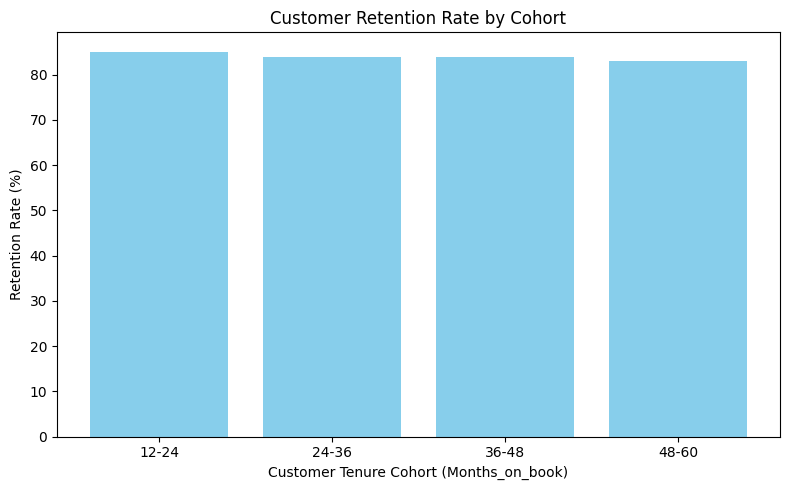

In [4]:

plt.figure(figsize=(8,5))
plt.bar(cohort_retention.index.astype(str), cohort_retention['retention_rate'], color='skyblue')
plt.title('Customer Retention Rate by Cohort')
plt.ylabel('Retention Rate (%)')
plt.xlabel('Customer Tenure Cohort (Months_on_book)')
plt.tight_layout()
plt.show()



Older tenure groups often show lower retention as customers gradually churn over time.  
Newer cohorts may appear more stable simply because they’ve had less exposure time.


## 4) Churn Trend by Tenure

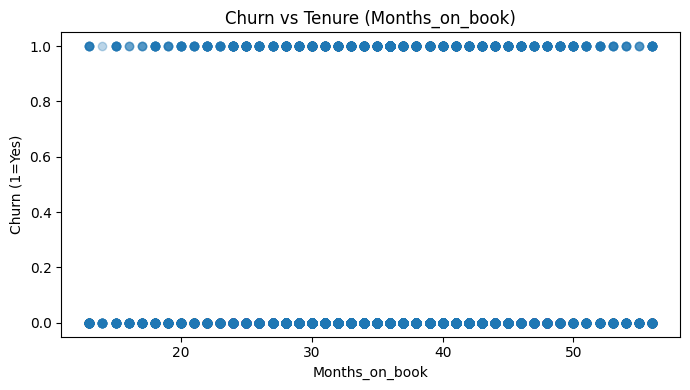

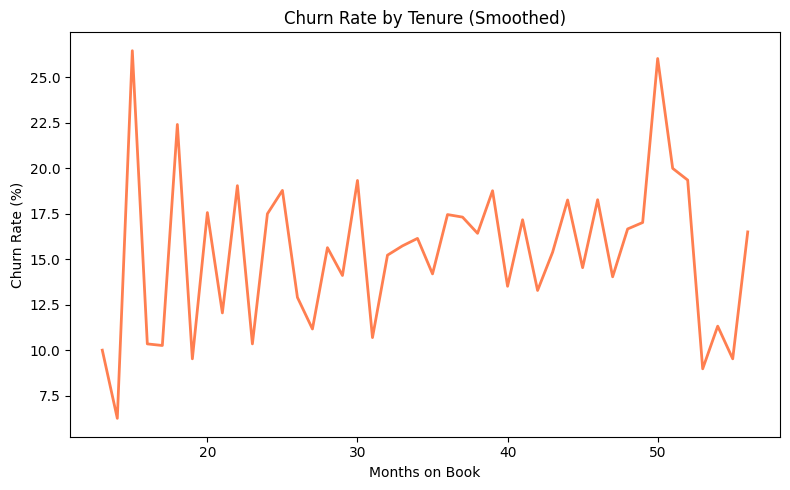

In [5]:

if 'Months_on_book' in df.columns:
    plt.figure(figsize=(7,4))
    plt.scatter(df['Months_on_book'], df['churn'], alpha=0.3)
    plt.title('Churn vs Tenure (Months_on_book)')
    plt.xlabel('Months_on_book')
    plt.ylabel('Churn (1=Yes)')
    plt.tight_layout()
    plt.show()

# Average churn per tenure group (smoother trend)
tenure_trend = df.groupby('Months_on_book')['churn'].mean() * 100
plt.figure(figsize=(8,5))
plt.plot(tenure_trend.index, tenure_trend.values, color='coral', linewidth=2)
plt.title('Churn Rate by Tenure (Smoothed)')
plt.xlabel('Months on Book'); plt.ylabel('Churn Rate (%)')
plt.tight_layout(); plt.show()



Retention tends to decline gradually as customers stay longer.  
A mid-tenure dip may reflect disengagement phases (e.g., after initial benefits expire).


## 5) Engagement Patterns by Tenure

/var/folders/ny/4tw5tw4d54v19gln_91znxxr0000gn/T/ipykernel_82631/3443539453.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cohort')[col].mean().plot(kind='bar', color='steelblue')


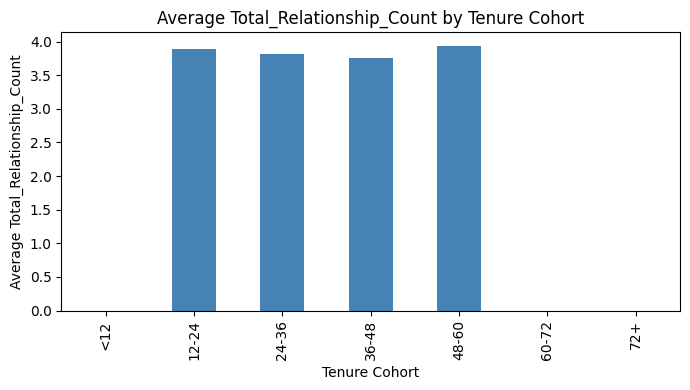

/var/folders/ny/4tw5tw4d54v19gln_91znxxr0000gn/T/ipykernel_82631/3443539453.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cohort')[col].mean().plot(kind='bar', color='steelblue')


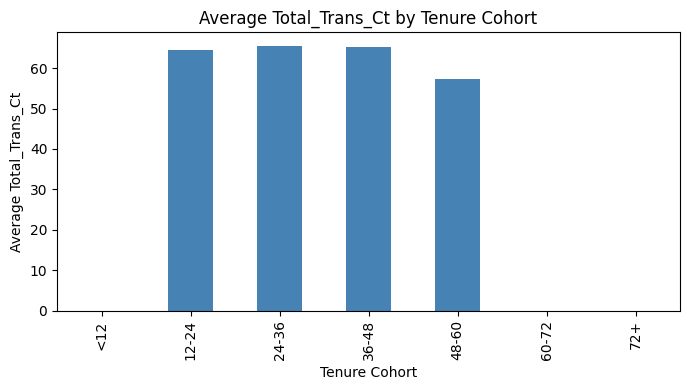

/var/folders/ny/4tw5tw4d54v19gln_91znxxr0000gn/T/ipykernel_82631/3443539453.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cohort')[col].mean().plot(kind='bar', color='steelblue')


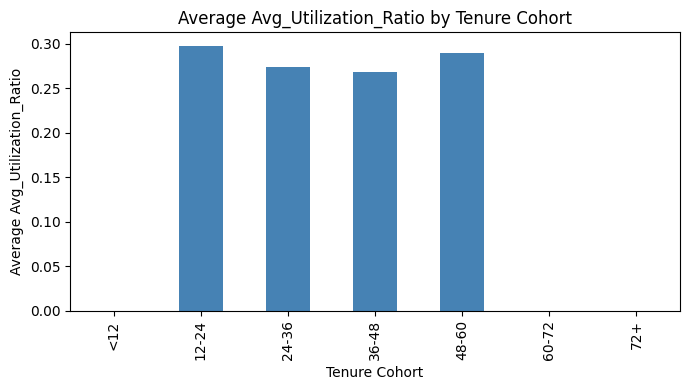

In [6]:

engagement_vars = ['Total_Relationship_Count','Total_Trans_Ct','Avg_Utilization_Ratio']
for col in engagement_vars:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        df.groupby('cohort')[col].mean().plot(kind='bar', color='steelblue')
        plt.title(f'Average {col} by Tenure Cohort')
        plt.ylabel(f'Average {col}')
        plt.xlabel('Tenure Cohort')
        plt.tight_layout()
        plt.show()



Customers with more relationships and higher transaction activity show better retention, confirming engagement drives loyalty.


## 6) Retention Matrix (Heatmap-Style View)

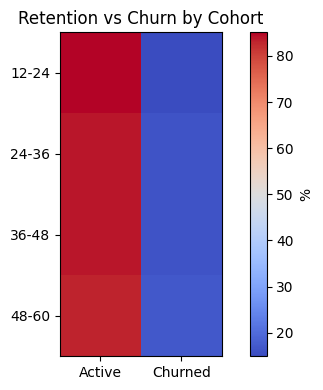

In [7]:

# Simulate a retention matrix based on grouped features (for visualization purposes)
retention_matrix = pd.crosstab(df['cohort'], df['churn'], normalize='index') * 100
plt.figure(figsize=(6,4))
plt.imshow(retention_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Retention vs Churn by Cohort')
plt.xticks([0,1], ['Active','Churned'])
plt.yticks(range(len(retention_matrix.index)), retention_matrix.index)
plt.colorbar(label='%')
plt.tight_layout()
plt.show()



This visual makes it easy to compare retention vs churn composition across tenure groups.



7) Summary Insights

Findings:
- Retention declines as customers mature — churn rises with tenure.  
- Engagement metrics like transaction count and relationship depth correlate with retention.  
- Recent customers (`<24 months`) typically retain better, possibly due to onboarding incentives.  
- Long-term customers (`60+ months`) may need renewed engagement strategies.

Business Recommendations:
1. Implement renewal campaigns around the 36–48 month mark.  
2. Offer loyalty perks or product bundling to maintain older customers.  
3. Track cohorts monthly to monitor improvement post-intervention.

